# Streaming Timeseries

<div style="border: 2px solid #ccc; border-radius: 8px; padding: 5px; display: inline-block;">
    <img src="./assets/streaming_header.png" alt="Streaming" style="display: block; max-width: 100%;">
</div>

In [1]:
from IPython.display import HTML

HTML(
    """
        <div style="display: flex; justify-content: center; padding: 10px;">
            <iframe
                width="560"
                height="315"
                src="https://www.youtube.com/embed/fXpHg9YvvR0?si=JSeEyvCz0IBdas4N"
                title="YouTube video player"
                frameborder="0"
                allow="accelerometer; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share"
                referrerpolicy="strict-origin-when-cross-origin"
                allowfullscreen
            ></iframe>
        </div>
    """
)

## Prerequisites

| What?                                                | Why?                                                  |
| ---------------------------------------------------- | ----------------------------------------------------- |
| [Index: Intro, Workflows, Extensions](./index.ipynb) | For context and workflow selection/feature guidance   |
| [Recommended Workflow](./multichan.ipynb)            | For live downsampling with in-memory Pandas DataFrame |

## Overview

For an introduction, please visit the ['Index'](./index.ipynb) page.

This tutorial guides you through building a multichannel timeseries streaming application,
visualizing either CPU usage or an EEG data file as if it was streaming live over a network
interface. The application shows how to create controls like selecting the data source and starting,
pausing, and stoping the data stream.

### Key Software:

- **[LSL](https://github.com/sccn/labstreaminglayer)** and
  **[MNE-LSL](https://mne.tools/mne-lsl/stable/index.html)**: Widely used neuroscience, Lab
  Streaming Layer (LSL) helps with the collection of measurement time series in research
  experiments. Here, it is used via the MNE-LSL python package to set up a mock live stream from a
  file on disk.

## Imports and Configuration

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
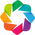

In [2]:
import abc
import time
import uuid
from pathlib import Path

import holoviews as hv
import mne
import pandas as pd
import panel as pn
import pooch
import psutil
from bokeh.palettes import Category20
from holoviews.streams import Buffer
from mne_lsl.player import PlayerLSL
from mne_lsl.stream import StreamLSL

hv.extension("bokeh")
pn.extension()

## Loading and Inspecting the Data

Let's get some data! This section walks through obtaining an EEG dataset (40 MB).

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Note</p>
    If you are viewing this notebook as a result of using the `anaconda-project run` command, the
    data has already been downloaded, as configured in the associated yaml file. Running the
    following cell should find that data and skip any further download.
</div>

In [3]:
DATA_URL = "https://datasets.holoviz.org/eeg_ant/v1/sample-ant-raw.fif"
DATA_DIR = Path("./data")
DATA_FILENAME = Path(DATA_URL).name
DATA_PATH = DATA_DIR / DATA_FILENAME
DATA_DIR.mkdir(parents=True, exist_ok=True)

# Download the data if it doesn't exist
if not DATA_PATH.exists():
    print(f"Downloading data to: {DATA_PATH}")
    pooch.retrieve(
        url=DATA_URL,
        known_hash=None,
        fname=DATA_FILENAME,
        path=DATA_DIR,
        progressbar=True,
    )
else:
    print(f"Data exists at: {DATA_PATH}")

Data exists at: data/sample-ant-raw.fif


## Creating Data Sources

We will create two data sources, and a python class to handle the management of each:

1. **CPU Usage:** Streams CPU usage percentages per core.
2. **EEG Usage:** Streams EEG data from a sample dataset.

Let's create a sort of recipe (abstract base class) to ensure that each data source class contains
certain methods. We want the class to tell us its channel names, positions, sampling interval, as
well as to start up the stream, generate some data, and stop the stream.

In [4]:
class DataSource(abc.ABC):
    @abc.abstractmethod
    def get_channel_names(self) -> list[str]:
        pass

    @abc.abstractmethod
    def get_channel_positions(self) -> list[dict] | None:
        pass

    @property
    @abc.abstractmethod
    def sampling_interval(self) -> float:
        pass

    @abc.abstractmethod
    def generate_data(self) -> pd.DataFrame:
        pass

    @abc.abstractmethod
    def start(self) -> None:
        pass

    @abc.abstractmethod
    def stop(self) -> None:
        pass

### CPU Usage Data Source

The `CPU_Usage` class streams CPU usage data using the `psutil` library. This acts as a sort of
simple test bench for us to stream some real data and make sure the plotting application is working.
Whenever `generate_data` is called, it will return a timestamped measurement of CPU usage across
your computer's cores.

In [5]:
class CPU_Usage(DataSource):
    def __init__(self, sampling_interval: float = 0.25, buffer_size: int = 5) -> None:
        cpu_count = psutil.cpu_count(logical=True)
        self.num_cores = int(cpu_count) if cpu_count is not None else 1

        self._sampling_interval = sampling_interval
        self.streaming = False

        self.channel_names = [f"CPU_{i}" for i in range(self.num_cores)]
        self._channel_positions = None  # No physical positions for CPU cores
        self.buffer_size = buffer_size

    @property
    def sampling_interval(self) -> float:
        return self._sampling_interval

    def get_channel_names(self) -> list[str]:
        return self.channel_names

    def get_channel_positions(self) -> None:
        return self._channel_positions

    def start(self) -> None:
        self.streaming = True

    def stop(self) -> None:
        self.streaming = False

    def generate_data(self) -> pd.DataFrame:
        if not self.streaming:
            return pd.DataFrame(columns=["time"] + self.channel_names)

        cpu_percent = psutil.cpu_percent(percpu=True)
        if cpu_percent:
            timestamp = pd.Timestamp.now()
            data = {"time": [timestamp]}
            for ch, usage in zip(self.channel_names, cpu_percent):
                if ch not in data:
                    data[ch] = []
                data[ch].append(usage)
            return pd.DataFrame(data)
        else:
            return pd.DataFrame(columns=["time"] + self.channel_names)

### LSL File Stream Data Source

The `LSL_EEG_File_Stream` class streams EEG data via a mock `LSL` live stream from a saved file,
using utilities from the `mne` and `mne_lsl` libraries.

This class is a bit more involved than the last and requires us to handle the stream setup (start)
and teardown (stop) in a particular way, according to the
[PlayerLSL](https://mne.tools/mne-lsl/stable/generated/api/mne_lsl.player.PlayerLSL.html) and
[StreamLSL](https://mne.tools/mne-lsl/stable/generated/api/mne_lsl.stream.StreamLSL.html#mne_lsl.stream.StreamLSL)
docs. However, the idea is the same, when `generate_data` is called, it will return timestamped
dataframe of the next block of channel measurements.

In [6]:
class LSL_EEG_File_Stream(DataSource):
    def __init__(self, fname: str, picks: str = "eeg") -> None:
        # Generate unique identifier for this stream instance
        self.source_id = uuid.uuid4().hex
        self.fname = fname
        self.name = f"MNE-LSL-{self.source_id}"

        self.chunk_size = 20

        self.player = PlayerLSL(
            self.fname,
            chunk_size=self.chunk_size,
            source_id=self.source_id,
            name=self.name,
        )

        self.stream = StreamLSL(
            bufsize=2,
            name=self.name,
            source_id=self.source_id,
        )

        self._sampling_interval = 0.02  # 20ms update rate
        self.streaming = False
        self.picks = picks
        self.reference = "average"

        # Set up channel names based on 'picks' input
        if self.picks == "eeg":
            ch_type_indices = mne.channel_indices_by_type(self.player.info)["eeg"]
            self.channel_names = [str(self.player.ch_names[i]) for i in ch_type_indices]
        else:
            self.channel_names = list(map(str, self.picks))

        # Get channel positions from standard 10-05 montage
        montage = mne.channels.make_standard_montage("standard_1005")
        positions = montage.get_positions()["ch_pos"]

        # Store positions for channels present in the montage
        self.channel_positions = []
        for ch in self.channel_names:
            if ch in positions:
                pos = positions[ch]
                self.channel_positions.append(
                    {
                        "xpos": pos[0],
                        "ypos": pos[1],
                        "ch": ch,
                    }
                )

    def get_channel_names(self) -> list[str]:
        return self.channel_names

    def get_channel_positions(self) -> list[dict]:
        return self.channel_positions

    @property
    def sampling_interval(self) -> float:
        return self._sampling_interval

    def start(self) -> None:
        if not self.streaming:
            self.player.start()
            # Allow time for stream initialization
            time.sleep(0.1)

            try:
                self.stream.connect(timeout=5.0)
            except RuntimeError as e:
                print(f"Failed to connect to LSL stream: {e}")
                self.player.stop()
                raise

            self.stream.pick(self.picks)
            if self.reference:
                self.stream.set_eeg_reference(self.reference)
            self.streaming = True

    def stop(self) -> None:
        if self.streaming:
            self.stream.disconnect()
            self.player.stop()
            self.streaming = False

    def generate_data(self) -> pd.DataFrame:
        if not self.streaming:
            return pd.DataFrame(columns=["time"] + self.channel_names)

        # Collect all new samples since last call
        data, ts = self.stream.get_data(
            self.stream.n_new_samples / self.stream.info["sfreq"],
            picks=self.channel_names,
        )

        if data.size > 0:
            # Convert timestamps to pandas
            ts = pd.to_datetime(ts, unit="s")
            new_data = pd.DataFrame({"time": ts})
            for i, ch in enumerate(self.channel_names):
                new_data[ch] = data[i]
            return new_data
        else:
            return pd.DataFrame(columns=["time"] + self.channel_names)

## Building the Streaming Application

The `StreamingApp` class below handles the user interface and streaming logic, integrating the data
sources with interactive controls. Comments are included for each part of the code that might need
additional context.

In [10]:
class StreamingApp(pn.viewable.Viewer):
    def __init__(
        self,
        data_sources: list,
        notebook: bool = True,
        buffer_length_samples: int = 5000,
    ) -> None:
        super().__init__()
        self.data_sources = data_sources
        self.notebook = notebook

        # Used to normalize timestamps relative to stream start
        self.initial_time = None

        # Create mappings for the data source selector dropdown
        self.data_source_instances = {type(ds).__name__: ds for ds in data_sources}
        self.data_source_names = list(self.data_source_instances.keys())
        self.data_source = self.data_source_names[0]

        # Sets up channel names and their color mapping based on the selected data source
        self.update_channel_names()

        self.buffer_length = buffer_length_samples
        # Circular buffer
        self.buffer = Buffer(data=self.initial_data(), length=self.buffer_length)

        self.streaming = False
        self.paused = False
        self.task = None  # Will store the periodic callback for data updates
        self.data_generator = None  # Active data source instance

        self.create_widgets()
        self.create_layout()

    def update_channel_names(self) -> None:
        data_source_instance = self.data_source_instances[self.data_source]
        self.channel_names = data_source_instance.get_channel_names()

        palette = Category20[20]
        self.color_mapping = {
            channel_name: palette[i]
            for i, channel_name in enumerate(self.channel_names)
        }

        self.current_sampling_interval = data_source_instance.sampling_interval

        # Reset buffer when channel configuration changes
        if hasattr(self, "buffer"):
            self.buffer.clear()
            self.buffer.data = self.initial_data()

    def initial_data(self) -> pd.DataFrame:
        # Create empty DataFrame with time and channel columns
        return pd.DataFrame({"time": [], **{ch: [] for ch in self.channel_names}})

    def create_widgets(self) -> None:
        # Data source selection dropdown
        self.data_source_widget = pn.widgets.Select(
            name="Data Source",
            options=self.data_source_names,
            value=self.data_source,
        )
        self.data_source_widget.param.watch(self.on_data_source_change, "value")

        # Stream control radio buttons with custom styling for active state
        self.radio_group = pn.widgets.RadioButtonGroup(
            name="Stream Control",
            options=["Start", "Pause", "Stop"],
            value="Stop",
            button_type="default",
            sizing_mode="stretch_width",
            stylesheets=[
                """
                :host(.solid) .bk-btn.bk-btn-default.bk-active {
                    background-color: #b23c3c;
                }
            """
            ],
        )
        self.radio_group.param.watch(self.handle_state_change, "value")

    def on_data_source_change(self, event) -> None:
        # Stop any existing stream before switching data sources
        time.sleep(0.1)
        self.stop_stream()
        self.data_source = event.new
        self.update_channel_names()

        # Reset visualization with empty plots
        self.main_streaming_pane.object = self.bare_stream_plot()
        self.position_pane.object = self.bare_pos_plot()

    def handle_state_change(self, event) -> None:
        # Route radio button selections to appropriate stream control methods
        if event.new == "Start":
            self.start_stream()
        elif event.new == "Pause":
            self.pause_stream()
        elif event.new == "Stop":
            self.stop_stream()

    def create_layout(self) -> None:
        # Initialize main visualization panes with empty plots
        self.position_pane = pn.pane.HoloViews(self.bare_pos_plot())
        self.main_streaming_pane = pn.pane.HoloViews(self.bare_stream_plot())

        if self.notebook:
            # Notebook layout: Sidebar and main plot side by side
            self.layout = pn.Row(
                pn.Column(
                    self.data_source_widget,
                    self.radio_group,
                    self.position_pane,
                    width=300,
                ),
                self.main_streaming_pane,
                align="start",
            )
        else:
            # Standalone app layout: widgets in sidebar
            sidebar = pn.Column(
                pn.WidgetBox(
                    self.data_source_widget,
                    self.radio_group,
                ),
                self.position_pane,
                sizing_mode="stretch_width",
            )
            self.template = pn.template.FastListTemplate(
                main=[self.main_streaming_pane],
                sidebar=[sidebar],
                title="Multi-Channel Streaming App",
                theme="dark",
                accent="#2e008b",
            )

    def start_stream(self) -> None:
        if not self.streaming:
            # Use context manager to show loading state while setting up stream
            with self.main_streaming_pane.param.update(loading=True):
                self.streaming = True
                self.paused = False

                # Initialize data generator and viz
                self.data_generator = self.data_source_instances[self.data_source_widget.value]
                self.position_pane.object = self.create_position_plot()
                self.data_generator.start()
                self.buffer.clear()
                self.initial_time = None  # Reset initial time when starting new stream

                # Set up dynamic plotting with the buffer as the data stream
                self.main_streaming_pane.object = hv.DynamicMap(
                    self.create_streaming_plot,
                    streams=[self.buffer],
                )

                # Start periodic data collection
                sampling_interval_ms = int(self.data_generator.sampling_interval * 100)
                print(sampling_interval_ms)
                self.task = pn.state.add_periodic_callback(
                    self.stream_data,
                    period=sampling_interval_ms,
                    count=None,
                )

        # Resume from paused state
        elif self.streaming and self.paused:
            self.paused = False
            if self.task is None:
                sampling_interval = 1 / 60
                if self.data_generator is not None:
                    sampling_interval = self.data_generator.sampling_interval
                sampling_interval_ms = int(sampling_interval * 100)
                print(sampling_interval_ms)
                self.task = pn.state.add_periodic_callback(
                    self.stream_data,
                    period=sampling_interval_ms,
                    count=None,
                )

    def pause_stream(self) -> None:
        if self.task:
            self.task.stop()
            self.task = None
        self.paused = True

    def stop_stream(self) -> None:
        if self.streaming:
            # Clean up streaming resources
            self.streaming = False
            self.paused = False
            if self.task:
                self.task.stop()
                self.task = None
            if self.data_generator is not None:
                self.data_generator.stop()

            # Reset UI and internal state
            self.radio_group.value = "Stop"
            self.main_streaming_pane.object = self.bare_stream_plot()
            self.buffer.clear()
            self.buffer.data = self.initial_data()
            self.data_generator = None
            self.initial_time = None

    def stream_data(self) -> None:
        if not self.streaming or self.paused:
            return
        # Panel's unlocked context manager prevents callback deadlocks
        with pn.io.unlocked():
            new_data_df = pd.DataFrame()
            if self.data_generator is not None:
                new_data_df = self.data_generator.generate_data()
            if not new_data_df.empty:
                self.buffer.send(new_data_df)

    def create_streaming_plot(self, data) -> hv.NdOverlay:
        overlays = {}

        if not data.empty and "time" in data.columns:
            # Store first timestamp to normalize all times relative to stream start
            if self.initial_time is None:
                self.initial_time = data["time"].iloc[0]

            data = data.copy()  # Create copy to avoid modifying the buffer's data

            # Convert 'time' to numerical seconds
            data["time"] = (data["time"] - self.initial_time).dt.total_seconds()

        # Create a curve for each channel's data
        for ch in self.channel_names:
            if ch in data.columns and not data[ch].dropna().empty:
                curve = hv.Curve(
                    (data["time"], data[ch]),
                    "Time (s)",
                    "Amplitude",
                    label=ch,
                ).opts(
                    line_width=2,
                    color=self.color_mapping.get(ch, None),
                    subcoordinate_y=True,
                )
                overlays[ch] = curve

        if overlays:
            ndoverlay = hv.NdOverlay(overlays).opts(
                show_legend=False,
                responsive=True,
                min_height=600,
                framewise=True,
                title="Data Stream",
                xlabel="Time (s)",
                ylabel="Amplitude",
            )
            return ndoverlay
        else:
            return self.empty_stream_plot()

    def create_position_plot(self) -> hv.Points:
        channel_positions = []
        if self.data_generator is not None:
            channel_positions = self.data_generator.get_channel_positions()
        if channel_positions:
            # channel positions and colors
            df = pd.DataFrame()
            if self.data_generator is not None:
                df = pd.DataFrame(self.data_generator.channel_positions)
            df["clr"] = df["ch"].map(self.color_mapping)

            points = hv.Points(df, ["xpos", "ypos"], vdims=["ch", "clr"]).opts(
                color="clr",
                size=20,
                alpha=0.5,
                tools=["hover"],
                marker="circle",
            )

            labels = hv.Labels(df, ["xpos", "ypos"], "ch").opts(
                text_color="black",
                text_font_size="8pt",
            )

            plot = (points * labels).opts(
                xaxis=None,
                yaxis=None,
                axiswise=True,
                height=300,
                responsive=True,
                shared_axes=False,
                title="Channel Position",
            )
            return plot
        return self.bare_pos_plot()

    def bare_stream_plot(self, min_height: int = 600) -> hv.Curve:
        curve = hv.Curve([]).opts(
            yaxis="bare",
            xaxis="bare",
            min_height=min_height,
            responsive=True,
        )
        return curve

    def empty_stream_plot(self) -> hv.NdOverlay:
        empty_curves = {
            ch: hv.Curve([]).relabel(ch).opts(
                subcoordinate_y=True,
                color=self.color_mapping.get(ch, None),
            )
            for ch in self.channel_names
        }
        ndoverlay = hv.NdOverlay(empty_curves).opts(
            legend_position="right",
            responsive=True,
            min_height=600,
            title="",
            show_legend=False,
        )
        return ndoverlay

    def bare_pos_plot(self) -> hv.Points:
        points = hv.Points([]).opts(
            xaxis=None,
            yaxis=None,
            axiswise=True,
            height=300,
            responsive=True,
            shared_axes=False,
            title="Channel Position",
        )
        return points

    def __panel__(self) -> pn.Row | pn.Column:
        if self.notebook:
            return self.layout
        else:
            return self.template

### Running the Application

Instantiate the data sources and create the application.

In [11]:
data_source_cpu_usage = CPU_Usage()

# display a subset of eeg channels with 'picks'
picks = ["F4", "F7", "FC5", "FC2", "T7", "CP2", "CP6", "P4", "P7", "O1", "O2"]
data_source_eeg_usage = LSL_EEG_File_Stream(
    "data/sample-ant-raw.fif",
    picks=picks,
)

nb_app = StreamingApp(data_sources=[data_source_eeg_usage, data_source_cpu_usage])

Opening raw data file data/sample-ant-raw.fif...
Isotrak not found
    Range : 0 ... 153602 =      0.000 ...   150.002 secs
Ready.
Reading 0 ... 153602  =      0.000 ...   150.002 secs...


In [12]:
nb_app

250

StreamingApp(name='StreamingApp00319')

<img
    src="./assets/streaming_nb.png"
    alt="Static Preview Multichan Standalone"
    align="right"
    width="70%">

**Here's a static snapshot of what the previous cell produces in the notebook. 👉**

<div style="clear: both;"></div>

## Using the Application

- **Select Data Source:** Use the dropdown to select data source.
- **Control Streaming:**
  - Click **Start** to begin streaming data from the selected source.
  - Click **Pause** to temporarily halt data updates without stopping the stream.
  - Click **Stop** to stop data updates and the data source itself.
- **Switching Data Sources:**
  - When you select a different data source, the app automatically stops the current data source
    before starting the new one.

## Standalone App Extension

HoloViz Panel allows for the deployment of this complex visualization as a standalone,
template-styled, interactive web application (outside of a Jupyter Notebook). Read more about Panel
[here](https://panel.holoviz.org/).

In the class above, we created a condition when `notebook=False` that adds our plot to the `main`
area of a Panel Template component and puts the widgets in the template's `sidebar`. All we need to
do now is create an instance and mark it as `servable`.

To launch the standalone app, activate the same conda environment and run
`panel serve <path-to-this-file> --show` in the command line. This will open the application in a
browser window.

<div class="admonition alert alert-warning">
    <p class="admonition-title" style="font-weight:bold">Warning</p>
    It is not recommended to have both a notebook version of the application and a served version of
    the same application running simultaneously. Prior to serving the standalone application, stop
    any active notebook stream, clear the notebook output, restart the notebook kernel, and save the
    unexecuted notebook file.
</div>

In [ ]:
standalone_app = StreamingApp(
    data_sources=[data_source_eeg_usage, data_source_cpu_usage], notebook=False
)
standalone_app.servable()
# semi-colon to suppress output in notebook

<img
    src="./assets/streaming_standalone.png"
    alt="Static Preview Multichan Standalone"
    align="right"
    width="70%">

**Here's a static snapshot of what the previous cell produces in a browser window when you serve the
standalone app (a templated Panel application). 👉**

<div style="clear: both;"></div>

## Conclusion

We've built a real-time multichannel streaming application that can handle different data sources,
including EEG data and CPU usage and that can be extended and customized for various real-time data
streaming needs.

## What Next?

- Customization: Modify the application to include additional data sources or customize the
  visualization options.
- Data Analysis: Extend the application to include data analysis features such as filtering, feature
  extraction, or event detection.

## Related Resources

| What?                                                | Why?                                                   |
| ---------------------------------------------------- | ------------------------------------------------------ |
|[MNE-Python Docs](https://mne.tools/stable/index.html)| For more information on EEG data handling and analysis |